### Как применить законы статистики к данным ? Сколько элементов сумм использовано в коде?

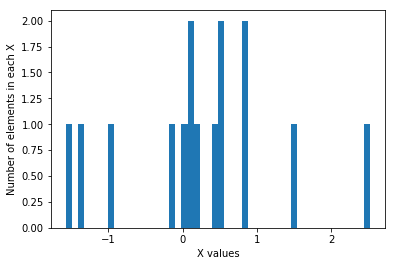

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math
import random
number_of_sums = 15
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

1. Как применить законы статистики к данным ? Сколько элементов сумм использовано в коде?
2. Чему равна матрица ковариаций для графика?
3. Построить преобразование с помощью вычисленной выше матрицей
4. Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически
5. При большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?
5. Посчитать как меняется вариация в зависимости от выбора собственного вектора.
6. Загрузить таблицу.
7. Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).
8. Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?
9. Линейное преобразование значений (проекция на ось)
10. На какую прямую проецируем?
11. Теория вероятности
12. Напишите код для моделирования 100 подбрасываний игрального кубика. 
13. Начертите диаграму histogram.

#### 12. Напишите код для моделирования 100 подбрасываний игрального кубика. 
#### 13. Начертите диаграму histogram.

(array([12.,  0., 12.,  0., 22.,  0., 18.,  0., 20., 16.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

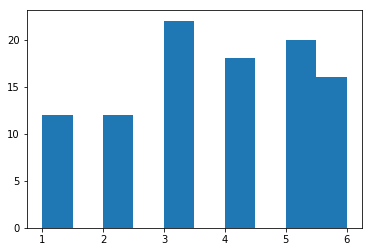

In [5]:
plt.hist(np.random.choice([1,2,3,4,5,6], 100))


#### 2. Чему равна матрица ковариаций для графика?
#### 3. Построить преобразование с помощью вычисленной выше матрицей

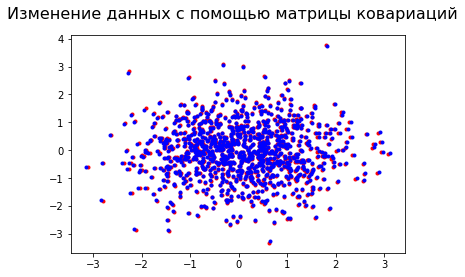

In [34]:
import numpy.linalg as la
n = 1000
X = np.random.randn(n,2)
stand = (X-X.mean())/X.std()
C = np.cov(stand.T)
A = la.cholesky(C)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

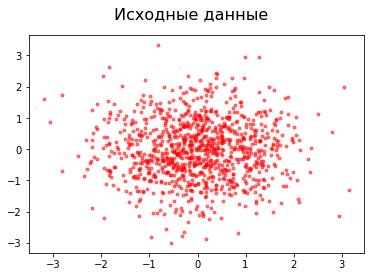

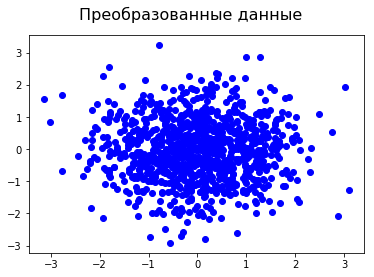

In [37]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = np.cov(x.T)
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()



#### 4. Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [40]:
i = 30
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  0.9367876539446703
теоритический подсчет:  [[0.96825507]]


#### 7. Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [7]:
df=pd.read_csv('http://yustiks.ru/avocado.csv')
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
df = df.filter(items = ['4046', '4046','4770'])
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.head()

,0,1,2
0,-0.230816,-0.230816,-0.212091
1,-0.231103,-0.231103,-0.211997
2,-0.231007,-0.231007,-0.211325
3,-0.230741,-0.230741,-0.211864
4,-0.230891,-0.230891,-0.211834


In [9]:
scaled_df.columns = ['avokado 4046', 'avokado 4225','avokado 4770']
scaled_df.corr()

,avokado 4046,avokado 4225,avokado 4770
avokado 4046,1.000000,1.000000,0.833389
avokado 4225,1.000000,1.000000,0.833389
avokado 4770,0.833389,0.833389,1.000000


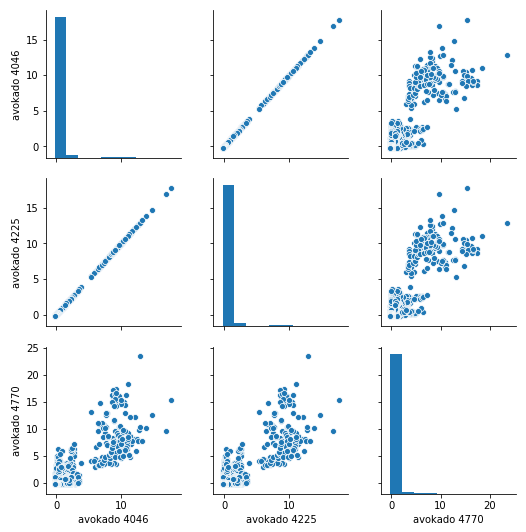

In [68]:
sns.pairplot(scaled_df)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


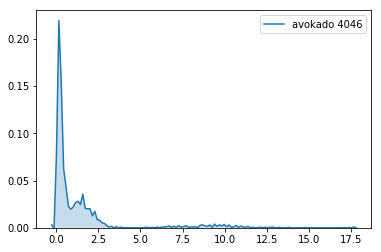

In [73]:
sns.kdeplot(scaled_df['avokado 4046'], shade = True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


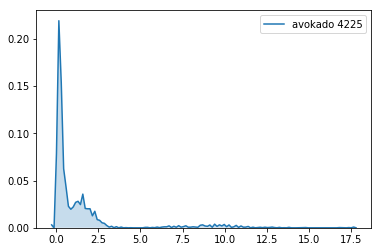

In [74]:
sns.kdeplot(scaled_df['avokado 4225'], shade = True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


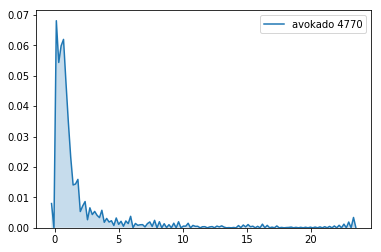

In [75]:
sns.kdeplot(scaled_df['avokado 4770'], shade = True)

#### 9. Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [ ]:
import numpy.linalg as la

X = np.vstack((scaled_df.iloc[:,-1], scaled_df.iloc[:,-2], scaled_df.iloc[:,-3]))
n=1000
Cb = np.cov(X.T)
w,v = la.eig(Cb)
for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X[0,:], X[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()